In [4]:
# This Python file uses the following encoding: utf-8
from PyQt6 import QtCore

import pickle
import os


def make_index(file):
    origins = []
    current_origin = 0

    original_position = file.tell()
    file.seek(0)

    while True:
        try:
            pickle.load(file)
            origins.append(current_origin)
            current_origin = file.tell()
        except EOFError:
            break

    file.seek(original_position)

    return origins

class DaqFile(QtCore.QObject):
    # Provides appending and random access to pickled objects in a file

    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.origins = None
        self.file = None

    def record(self):
        #does record require us to pickle??
        if(os.path.exists(self.filename)):
            print("Cannot overwrite an existing file")
            return
        self.file = open(self.filename, 'a+b')
        self.file = make_index(self.file)

    def playback(self):
        try:
            self.file = open(self.filename, 'r+b')
        except Exception as e:
            print(f"Exception: {e} in daqfile for playback")
            raise

        self.origins = make_index(self.file)
        return True

    def count(self):
        print(self.origins)
        print(type(self.origins))
        return len(self.origins)

    def get(self, n):
        self.file.seek(self.origins[n])
        return pickle.load(self.file)

    def append(self, obj):
        original_position = self.file.tell()

        self.file.seek(0, os.SEEK_END)
        self.origins.append(self.file.tell())
        pickle.dump(obj, self.file)

        self.file.seek(original_position)

    def seek(self, index):
        self.file.seek(self.origins[index])

    def next(self):
        # may throw EOFError
        return pickle.load(self.file)

    def close(self):
        self.file.close()


In [11]:
daqfile = DaqFile('C:\\Users\\MichaelKolb\\Downloads\\2024.02.29-14.26.55.npy')
print(type(daqfile))
print(daqfile)
daqfile.playback()
print(daqfile.count())

<class '__main__.DaqFile'>
[0, 390352, 780704, 1171056, 1561408, 1951760, 2342112, 2732464, 3122816, 3513168, 3903520, 4293872, 4684224, 5074576, 5464928, 5855280, 6245632, 6635984, 7026336, 7416688, 7807040, 8197392, 8587744, 8978096, 9368448, 9758800, 10149152, 10539504, 10929856, 11320208, 11710560, 12100912, 12491264, 12881616, 13271968, 13662320, 14052672, 14443024, 14833376, 15223728, 15614080, 16004432, 16394784, 16785136, 17175488, 17565840, 17956192, 18346544, 18736896, 19127248, 19517600, 19907952, 20298304, 20688656, 21079008, 21469360, 21859712, 22250064, 22640416, 23030768, 23421120, 23811472, 24201824, 24592176, 24982528, 25372880, 25763232, 26153584, 26543936, 26934288, 27324640, 27714992, 28105344, 28495696, 28886048, 29276400, 29666752, 30057104, 30447456, 30837808, 31228160, 31618512, 32008864, 32399216, 32789568, 33179920, 33570272, 33960624, 34350976, 34741328, 35131680, 35522032, 35912384, 36302736, 36693088, 37083440, 37473792, 37864144, 38254496, 38644848, 390352

In [12]:
import os

# unpacking the tuple
file_name, file_extension = os.path.splitext("/Users/pankaj/abc.txt")

print(file_name)
print(file_extension)

print(os.path.splitext("/Users/pankaj/.bashrc"))
print(os.path.splitext("/Users/pankaj/a.b/image.png"))

/Users/pankaj/abc
.txt
('/Users/pankaj/.bashrc', '')
('/Users/pankaj/a.b/image', '.png')


In [12]:
import pyqtgraph
from pyqtgraph.graphicsItems.ROI import ROI
from PyQt6.QtGui import QPainterPath

##NOTE: From pyqtgraph's implementation of ImageView
class PlotROI(ROI):
    def __init__(self, size, possize, randitem):
        super().__init__()
        # pass
        # print(f"plotroi: {self} {size} {possize} {randitem}")
        # ROI.__init__(self, pos=[0,0], size=size) #, scaleSnap=True, translateSnap=True)
        # self.addScaleHandle([1, 1], [0, 0])
        # self.addRotateHandle([0, 0], [0.5, 0.5])

In [6]:
p = QPainterPath()
p.setElementPositionAt()
# p.currentPosition()
# print(p.contin)

TypeError: setElementPositionAt(self, i: int, x: float, y: float): not enough arguments

In [8]:
user_input = "Stop"
user_input = user_input.split()
print(type(user_input[0]))

<class 'str'>


In [2]:
pts = [[0.007122377202069383, 0.004009986652777811], [0.007959604679354998, 0.0022649879982193396], [0.009555946605858021, 0.003336888776756654]]
print(pts[0:])
print(pts[:][1:])

[[0.007122377202069383, 0.004009986652777811], [0.007959604679354998, 0.0022649879982193396], [0.009555946605858021, 0.003336888776756654]]
[[0.007959604679354998, 0.0022649879982193396], [0.009555946605858021, 0.003336888776756654]]


In [2]:
lol = [
    [1,2,3],
    [4,5,6],
    [7,8,9],
]
# tuple will have to have a print statement
# print(lol[[2],[2],[2]])

TypeError: list indices must be integers or slices, not tuple

In [9]:
import zmq

print(zmq.POLLOUT)
print(zmq.POLLIN)
print(zmq.POLLOUT|zmq.POLLIN)
track = zmq.MessageTracker()
print(not track.done)

2
1
3
False


In [10]:
import time
import datetime
finish = []

for x in range(1000):
    start = time.time_ns()
    datetime.datetime.now()
    finish.append(time.time_ns() - start)

tot = sum(finish)
avg = tot / len(finish)
print(f"total {tot} ns, average {avg} ns")

total 998400 ns, average 998.4 ns


In [7]:
import numpy as np
turbo_colormap_data = np.array(
                      [[0.18995,0.07176,0.23217],
                       [0.19483,0.08339,0.26149],
                       [0.19956,0.09498,0.29024],
                       [0.20415,0.10652,0.31844],
                       [0.20860,0.11802,0.34607],
                       [0.21291,0.12947,0.37314],
                       [0.21708,0.14087,0.39964],
                       [0.22111,0.15223,0.42558],
                       [0.22500,0.16354,0.45096],
                       [0.22875,0.17481,0.47578],
                       [0.23236,0.18603,0.50004],
                       [0.23582,0.19720,0.52373],
                       [0.23915,0.20833,0.54686],
                       [0.24234,0.21941,0.56942],
                       [0.24539,0.23044,0.59142],
                       [0.24830,0.24143,0.61286],
                       [0.25107,0.25237,0.63374],
                       [0.25369,0.26327,0.65406],
                       [0.25618,0.27412,0.67381],
                       [0.25853,0.28492,0.69300],
                       [0.26074,0.29568,0.71162],
                       [0.26280,0.30639,0.72968],
                       [0.26473,0.31706,0.74718],
                       [0.26652,0.32768,0.76412],
                       [0.26816,0.33825,0.78050],
                       [0.26967,0.34878,0.79631],
                       [0.27103,0.35926,0.81156],
                       [0.27226,0.36970,0.82624],
                       [0.27334,0.38008,0.84037],
                       [0.27429,0.39043,0.85393],
                       [0.27509,0.40072,0.86692],
                       [0.27576,0.41097,0.87936],
                       [0.27628,0.42118,0.89123],
                       [0.27667,0.43134,0.90254],
                       [0.27691,0.44145,0.91328],
                       [0.27701,0.45152,0.92347],
                       [0.27698,0.46153,0.93309],
                       [0.27680,0.47151,0.94214],
                       [0.27648,0.48144,0.95064],
                       [0.27603,0.49132,0.95857],
                       [0.27543,0.50115,0.96594],
                       [0.27469,0.51094,0.97275],
                       [0.27381,0.52069,0.97899],
                       [0.27273,0.53040,0.98461],
                       [0.27106,0.54015,0.98930],
                       [0.26878,0.54995,0.99303],
                       [0.26592,0.55979,0.99583],
                       [0.26252,0.56967,0.99773],
                       [0.25862,0.57958,0.99876],
                       [0.25425,0.58950,0.99896],
                       [0.24946,0.59943,0.99835],
                       [0.24427,0.60937,0.99697],
                       [0.23874,0.61931,0.99485],
                       [0.23288,0.62923,0.99202],
                       [0.22676,0.63913,0.98851],
                       [0.22039,0.64901,0.98436],
                       [0.21382,0.65886,0.97959],
                       [0.20708,0.66866,0.97423],
                       [0.20021,0.67842,0.96833],
                       [0.19326,0.68812,0.96190],
                       [0.18625,0.69775,0.95498],
                       [0.17923,0.70732,0.94761],
                       [0.17223,0.71680,0.93981],
                       [0.16529,0.72620,0.93161],
                       [0.15844,0.73551,0.92305],
                       [0.15173,0.74472,0.91416],
                       [0.14519,0.75381,0.90496],
                       [0.13886,0.76279,0.89550],
                       [0.13278,0.77165,0.88580],
                       [0.12698,0.78037,0.87590],
                       [0.12151,0.78896,0.86581],
                       [0.11639,0.79740,0.85559],
                       [0.11167,0.80569,0.84525],
                       [0.10738,0.81381,0.83484],
                       [0.10357,0.82177,0.82437],
                       [0.10026,0.82955,0.81389],
                       [0.09750,0.83714,0.80342],
                       [0.09532,0.84455,0.79299],
                       [0.09377,0.85175,0.78264],
                       [0.09287,0.85875,0.77240],
                       [0.09267,0.86554,0.76230],
                       [0.09320,0.87211,0.75237],
                       [0.09451,0.87844,0.74265],
                       [0.09662,0.88454,0.73316],
                       [0.09958,0.89040,0.72393],
                       [0.10342,0.89600,0.71500],
                       [0.10815,0.90142,0.70599],
                       [0.11374,0.90673,0.69651],
                       [0.12014,0.91193,0.68660],
                       [0.12733,0.91701,0.67627],
                       [0.13526,0.92197,0.66556],
                       [0.14391,0.92680,0.65448],
                       [0.15323,0.93151,0.64308],
                       [0.16319,0.93609,0.63137],
                       [0.17377,0.94053,0.61938],
                       [0.18491,0.94484,0.60713],
                       [0.19659,0.94901,0.59466],
                       [0.20877,0.95304,0.58199],
                       [0.22142,0.95692,0.56914],
                       [0.23449,0.96065,0.55614],
                       [0.24797,0.96423,0.54303],
                       [0.26180,0.96765,0.52981],
                       [0.27597,0.97092,0.51653],
                       [0.29042,0.97403,0.50321],
                       [0.30513,0.97697,0.48987],
                       [0.32006,0.97974,0.47654],
                       [0.33517,0.98234,0.46325],
                       [0.35043,0.98477,0.45002],
                       [0.36581,0.98702,0.43688],
                       [0.38127,0.98909,0.42386],
                       [0.39678,0.99098,0.41098],
                       [0.41229,0.99268,0.39826],
                       [0.42778,0.99419,0.38575],
                       [0.44321,0.99551,0.37345],
                       [0.45854,0.99663,0.36140],
                       [0.47375,0.99755,0.34963],
                       [0.48879,0.99828,0.33816],
                       [0.50362,0.99879,0.32701],
                       [0.51822,0.99910,0.31622],
                       [0.53255,0.99919,0.30581],
                       [0.54658,0.99907,0.29581],
                       [0.56026,0.99873,0.28623],
                       [0.57357,0.99817,0.27712],
                       [0.58646,0.99739,0.26849],
                       [0.59891,0.99638,0.26038],
                       [0.61088,0.99514,0.25280],
                       [0.62233,0.99366,0.24579],
                       [0.63323,0.99195,0.23937],
                       [0.64362,0.98999,0.23356],
                       [0.65394,0.98775,0.22835],
                       [0.66428,0.98524,0.22370],
                       [0.67462,0.98246,0.21960],
                       [0.68494,0.97941,0.21602],
                       [0.69525,0.97610,0.21294],
                       [0.70553,0.97255,0.21032],
                       [0.71577,0.96875,0.20815],
                       [0.72596,0.96470,0.20640],
                       [0.73610,0.96043,0.20504],
                       [0.74617,0.95593,0.20406],
                       [0.75617,0.95121,0.20343],
                       [0.76608,0.94627,0.20311],
                       [0.77591,0.94113,0.20310],
                       [0.78563,0.93579,0.20336],
                       [0.79524,0.93025,0.20386],
                       [0.80473,0.92452,0.20459],
                       [0.81410,0.91861,0.20552],
                       [0.82333,0.91253,0.20663],
                       [0.83241,0.90627,0.20788],
                       [0.84133,0.89986,0.20926],
                       [0.85010,0.89328,0.21074],
                       [0.85868,0.88655,0.21230],
                       [0.86709,0.87968,0.21391],
                       [0.87530,0.87267,0.21555],
                       [0.88331,0.86553,0.21719],
                       [0.89112,0.85826,0.21880],
                       [0.89870,0.85087,0.22038],
                       [0.90605,0.84337,0.22188],
                       [0.91317,0.83576,0.22328],
                       [0.92004,0.82806,0.22456],
                       [0.92666,0.82025,0.22570],
                       [0.93301,0.81236,0.22667],
                       [0.93909,0.80439,0.22744],
                       [0.94489,0.79634,0.22800],
                       [0.95039,0.78823,0.22831],
                       [0.95560,0.78005,0.22836],
                       [0.96049,0.77181,0.22811],
                       [0.96507,0.76352,0.22754],
                       [0.96931,0.75519,0.22663],
                       [0.97323,0.74682,0.22536],
                       [0.97679,0.73842,0.22369],
                       [0.98000,0.73000,0.22161],
                       [0.98289,0.72140,0.21918],
                       [0.98549,0.71250,0.21650],
                       [0.98781,0.70330,0.21358],
                       [0.98986,0.69382,0.21043],
                       [0.99163,0.68408,0.20706],
                       [0.99314,0.67408,0.20348],
                       [0.99438,0.66386,0.19971],
                       [0.99535,0.65341,0.19577],
                       [0.99607,0.64277,0.19165],
                       [0.99654,0.63193,0.18738],
                       [0.99675,0.62093,0.18297],
                       [0.99672,0.60977,0.17842],
                       [0.99644,0.59846,0.17376],
                       [0.99593,0.58703,0.16899],
                       [0.99517,0.57549,0.16412],
                       [0.99419,0.56386,0.15918],
                       [0.99297,0.55214,0.15417],
                       [0.99153,0.54036,0.14910],
                       [0.98987,0.52854,0.14398],
                       [0.98799,0.51667,0.13883],
                       [0.98590,0.50479,0.13367],
                       [0.98360,0.49291,0.12849],
                       [0.98108,0.48104,0.12332],
                       [0.97837,0.46920,0.11817],
                       [0.97545,0.45740,0.11305],
                       [0.97234,0.44565,0.10797],
                       [0.96904,0.43399,0.10294],
                       [0.96555,0.42241,0.09798],
                       [0.96187,0.41093,0.09310],
                       [0.95801,0.39958,0.08831],
                       [0.95398,0.38836,0.08362],
                       [0.94977,0.37729,0.07905],
                       [0.94538,0.36638,0.07461],
                       [0.94084,0.35566,0.07031],
                       [0.93612,0.34513,0.06616],
                       [0.93125,0.33482,0.06218],
                       [0.92623,0.32473,0.05837],
                       [0.92105,0.31489,0.05475],
                       [0.91572,0.30530,0.05134],
                       [0.91024,0.29599,0.04814],
                       [0.90463,0.28696,0.04516],
                       [0.89888,0.27824,0.04243],
                       [0.89298,0.26981,0.03993],
                       [0.88691,0.26152,0.03753],
                       [0.88066,0.25334,0.03521],
                       [0.87422,0.24526,0.03297],
                       [0.86760,0.23730,0.03082],
                       [0.86079,0.22945,0.02875],
                       [0.85380,0.22170,0.02677],
                       [0.84662,0.21407,0.02487],
                       [0.83926,0.20654,0.02305],
                       [0.83172,0.19912,0.02131],
                       [0.82399,0.19182,0.01966],
                       [0.81608,0.18462,0.01809],
                       [0.80799,0.17753,0.01660],
                       [0.79971,0.17055,0.01520],
                       [0.79125,0.16368,0.01387],
                       [0.78260,0.15693,0.01264],
                       [0.77377,0.15028,0.01148],
                       [0.76476,0.14374,0.01041],
                       [0.75556,0.13731,0.00942],
                       [0.74617,0.13098,0.00851],
                       [0.73661,0.12477,0.00769],
                       [0.72686,0.11867,0.00695],
                       [0.71692,0.11268,0.00629],
                       [0.70680,0.10680,0.00571],
                       [0.69650,0.10102,0.00522],
                       [0.68602,0.09536,0.00481],
                       [0.67535,0.08980,0.00449],
                       [0.66449,0.08436,0.00424],
                       [0.65345,0.07902,0.00408],
                       [0.64223,0.07380,0.00401],
                       [0.63082,0.06868,0.00401],
                       [0.61923,0.06367,0.00410],
                       [0.60746,0.05878,0.00427],
                       [0.59550,0.05399,0.00453],
                       [0.58336,0.04931,0.00486],
                       [0.57103,0.04474,0.00529],
                       [0.55852,0.04028,0.00579],
                       [0.54583,0.03593,0.00638],
                       [0.53295,0.03169,0.00705],
                       [0.51989,0.02756,0.00780],
                       [0.50664,0.02354,0.00863],
                       [0.49321,0.01963,0.00955],
                       [0.47960,0.01583,0.01055],
                       [1,1,1]])

# turbo_colormap_data = turbo_colormap_data*255
# y = 257 // 48
# for x in range (257):
#     if (x % y) == 0:
#         print(turbo_colormap_data[x])

In [10]:
import PyQt6
from PyQt6 import QtGui, QtWidgets, QtCore
 
# importing system
import sys
import random
 
# importing numpy as np
import numpy as np
 
# importing pyqtgraph as pg
import pyqtgraph as pg

x = [[] for ct in range(42)]
for ct in range(42):
    for y in range(1000):
        if 700 < y < 850:
            x[ct].append((random.randrange(1,2)*(random.randrange(1,255))))
        else:
            x[ct].append(0)
    # print(x[ct])

# print(x)
# print(x)
x = np.array(x)

plot = pg.plot()
plot.setBackground('w')
plot.setXRange(0,42)
plot.setYRange(0,65535)
# plot.setlimits(xMin=0,xMax=nbins,yMin=0,yMax=nbins)

tr = QtGui.QTransform()  # prepare ImageItem transformation:
tr.scale(1.0, 65.535)       # scale horizontal and vertical axes
# tr.translate(-1.5, -1.5) # move 3x3 image to locate center at axis origin

# image = np.eye(3)
# print(image)

# img = pg.ImageItem( image, levels=(0,1) ) # create example image
img = pg.ImageItem(x, levels=(0,1))
#need to set a color map that is probably about 500 colors long at least or set it so that at like 500 events it changes colors
new_turbo_colormap_data = turbo_colormap_data * 255
color = new_turbo_colormap_data[::-1]
cmap = pg.ColorMap(pos=None, color=color)

# print(pg.colormap.get('CET-L19'))
# img.setColorMap(pg.colormap.get('turbo'))
img.setColorMap(cmap)
img.setLevels((0,255))
img.setTransform(tr)

plot.addItem( img )  # add ImageItem to PlotItem
plot.showAxes(True)  # frame it with a full set of axes
plot.invertY(False)   # vertical axis counts top to bottom

QtWidgets.QApplication.exec()

0

In [4]:
x = [0 for ct in range(42)]
print(x)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
# importing PyQt6
import PyQt6
from PyQt6 import QtGui, QtWidgets, QtCore
 
# importing system
import sys
 
# importing numpy as np
import numpy as np
 
# importing pyqtgraph as pg
import pyqtgraph as pg


color_lost = []


# Create some random numbers
n = 100
x = np.random.randn(n)
y = (1.5 * x) + np.random.randn(n)

# print(f"x: {x}")
# print(f"y: {y}")
# Estimate the 2D histogram
nbins = 200
H, xedges, yedges = np.histogram2d(x,y,bins=50)
print(f"H: {H}")

H = np.rot90(H)
H = np.flipud(H)

# Hmasked = np.ma.masked_where(H==0,H)


# plot = pg.PlotWidget()
plot = pg.plot()
plot.setBackground('w')
plot.setXRange(0,nbins)
plot.setYRange(0,nbins)
# plot.setlimits(xMin=0,xMax=nbins,yMin=0,yMax=nbins)

# tr = QtGui.QTransform()  # prepare ImageItem transformation:
# tr.scale(6.0, 3.0)       # scale horizontal and vertical axes
# tr.translate(-1.5, -1.5) # move 3x3 image to locate center at axis origin

# image = np.eye(3)
# print(image)

# img = pg.ImageItem( image, levels=(0,1) ) # create example image
img = pg.ImageItem(H, levels=(0,1))

color = turbo_colormap_data[::-1]
cmap = pg.ColorMap(pos=None, color=color)
# print(cmap[1].name())

img.setColorMap(cmap)
img.setLevels((0,255))


plot.addItem( img )  # add ImageItem to PlotItem
plot.showAxes(True)  # frame it with a full set of axes
plot.invertY(False)   # vertical axis counts top to bottom

QtWidgets.QApplication.exec()

H: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


0

In [14]:
setup = np.array(
   [[244,67,54],
    [233,30,99],
    [156,39,176],
    [103,58,183],
    [63,81,181],
    [33,150,243],
    [0,150,136],
    [139,195,74],
    [255,235,59],
    [255,152,0],
    [255,87,34],
    [30,50,56]])
setup = setup/255
# print(setup)
listo = ["key", "top", "old"]
print(listo.index("old"))

2


In [15]:
import colorcet as cc
from colorcet.plotting import swatch, swatches
import holoviews as hv
hv.extension('matplotlib')
from matplotlib.cm import get_cmap

# get_cmap("cet_fire")
# swatch('fire')


# colorlist = ['%06X' % idx for idx in range(0x8000, 0xffff)]
colorlist = ['#%06x' % idx for idx in range(0xff0000, 0xffffff, 0x000300)]
colorlist2 = ['#%06x' % idx for idx in range(0xffff00, 0xffffff, 0x000003)]
newcolorlist=[]
newcolorlist2=[]
for x in range(0,255,3):
    newcolorlist.append(((255),(x),(0)))
for x in range(0,255,3):
    newcolorlist2.append(((255),(255),(x)))
# print(colorlist)
# print(colorlist2)
# cmap=colorlist
colorlist.extend(colorlist2)
newcolorlist.extend(newcolorlist2)
print(newcolorlist)
# print(colorlist2)
print(len(colorlist))
swatch(name='custom', cmap=colorlist)

ModuleNotFoundError: No module named 'colorcet'

In [16]:
data = {'pos': (0.00025905, 0.00295525)}
print(type(data['pos']))

<class 'tuple'>


In [45]:
import configparser as cfp
import sys
import os
import numpy as np

config = cfp.ConfigParser()

if os.path.exists('test.ini'):
    config.read('test.ini')
else:
    config['adc_channels'] = {}
    config['photon_channels'] = {}
    for i in range(12):
        config['adc_channels'][f'channel {i}'] = '0 nm'
        config['photon_channels'][f'channel {i}'] = '0 nm'
    with open('test.ini', 'w') as configfile:
        config.write(configfile)


tempsections = config.sections()
if 'adc_channels' and 'photon_channels' not in tempsections:
    print("Error")

print(config.sections())
temp = config.items('adc_channels')
print(len(temp))
x,y = np.shape(temp)
print(f"x,y: {x}, {y}")
print(temp[0])

# for i in range(12):
#     config['adc_channels'][f'channel {i}'] = '100 nm'
#     config['photon_channels'][f'channel {i}'] = '100 nm'
# with open(f'test.ini{x}', 'w') as configfile:
#     config.write(configfile)
adc_channels = config.items('adc_channels')
templist = [adc_channels[x][-1] for x in range(len(adc_channels))]
print(templist)


['adc_channels', 'photon_channels']
12
x,y: 12, 2
('channel 0', '100 nm')
['100 nm', '100 nm', '100 nm', '100 nm', '100 nm', '100 nm', '100 nm', '100 nm', '100 nm', '100 nm', '100 nm', '100 nm']


In [14]:
import configparser
config = configparser.ConfigParser()
config['DEFAULT'] = {'ServerAliveInterval': '45',
                     'Compression': 'yes',
                     'CompressionLevel': '9'}
config['forge.example'] = {}
config['forge.example']['User'] = 'hg'
config['topsecret.server.example'] = {}
topsecret = config['topsecret.server.example']
topsecret['Port'] = '50022'     # mutates the parser
topsecret['ForwardX11'] = 'no'  # same here
config['DEFAULT']['ForwardX11'] = 'yes'
with open('example.ini', 'w') as configfile:
  config.write(configfile)

In [ ]:
CRITICAL = True
ERROR = True
WARNING = True
def safeprint(string, type):
    if not CRITICAL:
        return
    if type == "ERROR" and ERROR:
        print(f"ERROR: {string}")
    if type == "WARNING":
        print(f"WARNING: {string}")


In [9]:
products = {}
products["serialn"] = [1]
products["data"] = {}
products["data"]["adc_data"] = [ [0,0,0],[0,0,0],[0,0,0] ]
products["data"]["count_data"] = [ [0,0,0],[0,0,0],[0,0,0] ]
print(products)

products["serialn"].append(2)
products["data"]["adc_data"].extend([[1,1,1],[1,1,1],[1,1,1]])
# products["data"]["adc_data"].append([[1,1,1],[1,1,1],[1,1,1]])
products["data"]["count_data"].extend([[1,1,1],[1,1,1],[1,1,1]])
print(products)

{'serialn': [1], 'data': {'adc_data': [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 'count_data': [[0, 0, 0], [0, 0, 0], [0, 0, 0]]}}
{'serialn': [1, 2], 'data': {'adc_data': [[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 1]], 'count_data': [[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 1]]}}


In [46]:
import sys
output = {}
output["adc_data"] = {}
output["count_data"] = {}
output["adc_data"]["peak"] = []
output["adc_data"]["area"] = []
output["adc_data"]["width"] = []
output["count_data"]["peak"] = []
output["count_data"]["area"] = []
output["count_data"]["width"] = []
output["count_data"]["total"] = []
for n in range(42):
    if len(output["adc_data"]["peak"]) < (n+1):
        output["adc_data"]["peak"].append([])
        output["adc_data"]["area"].append([])
        output["adc_data"]["width"].append([])
        output["count_data"]["peak"].append([])
        output["count_data"]["area"].append([])
        output["count_data"]["width"].append([])
        output["count_data"]["total"].append([])
#Just above is 184 bytes
for t in range (2500):
    for n in range(42):
        output["adc_data"]["peak"][n].append(65535)

total_size = sys.getsizeof(output["adc_data"]["peak"][0]) * 42 * 4 * 2500
print(output["adc_data"]["peak"].index(max(output["adc_data"]["peak"])))
gb_size = 1000000000
print(total_size)
print(total_size/gb_size)
# print(sys.getsizeof(output["adc_data"]["peak"]) * 7 * 2500)

0
8625120000
8.62512


In [45]:
import numpy as np
from scipy.stats import mode as mode
ch = [1,3,5,7,2,6,15,22,16,17,15,15,15,2,2,2,2,2,2,2,2,2]
print(f"mean: {np.mean(ch)}")
print(f"mode: {mode(ch)[0]}")
norm = ch-mode(ch)[0]
print(norm)
print(sum(norm))
print(ch.index(max(ch)))
# adc_max_index.append(input["adc_data"].index(max(input["adc_data"][:,n])))


mean: 7.136363636363637
mode: 2
[-1  1  3  5  0  4 13 20 14 15 13 13 13  0  0  0  0  0  0  0  0  0]
113
7


In [5]:
import multiprocessing as mp
from multiprocessing import Pool
from multiprocessing.pool import ThreadPool as pool

def f(x):
    return x*x
    
if __name__ == "__main__":
    # p = Pool()
    # p = pool()
    # results = p.map(f, [1,2,3])
    # print(results)
    # p.close()
    # p.join()
    # with Pool(5) as p:
    
    with pool(5) as p:
        print(p.map(f, [1, 2, 3]))
        p.close()
        p.join()

print(f"Number of cpu: {mp.cpu_count()}")

[1, 4, 9]
Number of cpu: 24


In [13]:
import multiprocessing as mp
from multiprocessing import Pool
from multiprocessing.pool import ThreadPool as pool
import random
import time


class testclass:
    def __init__(self):
        self.numbers = [random.randint(1,128) for x in range(10)]
        self.words = ['test', 'quiz', 'book']
        self.encyclopedia = {'channel1' : 'off', 'channel2' : 'on'}
    
    def h(self):
        for item, state in self.encyclopedia.items():
            if state == 'on':
                continue
                # print(f"{item} is on")
            else:
                self.encyclopedia[item] = 'on'
                # print(f"Turnning on {item}")
                self.i()

    def i(self):
        # print(f"normal: {self.numbers}")
        # self.numbers.reverse()
        print(self.numbers)
        self.numbers += 1
        # print(f"reversed: {self.numbers}")

    def j(self):
        # print(f"normal words: {self.words}")
        self.words.reverse()
        # print(f"reversed words: {self.words}")

    def setup(self):
        self.process = mp.Process(target=self.i, args=(self,))
        print("Starting process")
        self.process.start()

    def finish(self):
        self.process.join()
        self.process.kill()


def g(x):
    x.reverse()

def f(x):
    # return x*x
    # print(x)
    g(x)
    # print(x)
    for ct in range(len(x)):
        x[ct] = (ct%3) * random.randint(1,128) + x[ct]

    print(x)

if __name__ == "__main__":
    
    # array1 = [[x for x in range(10)] for ct in range(10)]
    # print(array1)

    # with pool(5) as p:
    #     # print(p.map(f, [1, 2, 3]))
    #     p.map(f, array1)
    #     p.close()
    #     p.join()

    # print(array1)
    timestart = 0
    timeend = 0
    initClass = testclass()
    array1 = []
    array2 = []
    for x in range(10): #1000000
        array1.append(testclass())
        # array2.append(testclass())
    
    # print(array1)
    # for key, value in array1[0].encyclopedia.items():
    #     print(f"item: {key}, state: {value}")

    print(initClass.numbers)

    initClass.setup()    

    time.sleep(20)
    print(initClass.numbers)


    # print(f"starting: {array1[0].encyclopedia}")
    # timestart = time.time()
    # with pool(5) as p:
    #     p.map(testclass.h, array1)
    #     p.map(testclass.j, array1)
    # timeend = time.time()

    # print(f"Pool runtime: {timeend - timestart}")

    # print(f"ending: {array1[0].encyclopedia}")

    # timestart = time.time()
    # for i in range(len(array1)):
    #     array1[i].h()
    #     array1[i].j()
    # timeend = time.time()
    # print(f"Non pool runtime: {timeend - timestart}")
    
# Pool runtime: 0.5830783843994141
# Non pool runtime: 0.5050392150878906

[91, 41, 42, 83, 54, 61, 126, 128, 16, 47]
Starting process
[91, 41, 42, 83, 54, 61, 126, 128, 16, 47]


In [24]:
import numpy as np

arr1 = [[1, 2, 3], [4, 5, 6]]

arr2 = [[7, 8, 9], [0, 1, 2]]

arr3 = [[1, 2, 3], [4, 5, 6]]

arr4 = [[7, 8, 9], [0, 1, 2]]

arr5 = [[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]]
print(arr5)
arr5 = np.column_stack(arr5)
print(arr5)
for i in [arr1, arr2, arr3, arr4]:
    arr1 = np.column_stack((arr1, i))
# arr = np.concatenate((arr1, arr2), axis=0)

# arr = np.dstack(arr1, arr2, axis=1)
# print(arr1.shape())
print(arr1)

[[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]]
[[1 2 3 1 2 3 1 2 3]
 [4 5 6 4 5 6 4 5 6]]
[[1 2 3 1 2 3 7 8 9 1 2 3 7 8 9]
 [4 5 6 4 5 6 0 1 2 4 5 6 0 1 2]]


In [1]:
import json

# a Python object (dict):
x = {
  "name": "John",
  "class" : {
  		"age": 30,
  		"city": "New York"
  }
}

#x={}
#x["name"] = "John"
#x["age"] = 30
#x["city"] = "New York"
#x["class"] = {}
#x["class"]["night"] = "Math"
#x["class"]["day"] = "Ag"

# convert into JSON:
y = json.dumps(x)

# the result is a JSON string:
print(y)

# some JSON:
x = '{ "name":"John", "age":30, "city":"New York"}'

# parse x:
y = json.loads(x)

# the result is a Python dictionary:
print(y["age"])


{"name": "John", "class": {"age": 30, "city": "New York"}}


In [3]:
import sys
from PyQt6 import QtWidgets, QtGui
import numpy as np
import PyQt6
import pyqtgraph as pg
# import pyqtgraph.exporters as exp
# from pyqtgraph.Qt import QtGui, mkQApp


plot = pg.plot()

# Set To Larger Font
leftAxis = plot.getAxis('left')
bottomAxis = plot.getAxis('bottom')
font = QtGui.QFont("Roboto", 18)
leftAxis.setTickFont(font)
bottomAxis.setTickFont(font)

# Example: Transformed display of ImageItem
tr = QtGui.QTransform()  # prepare ImageItem transformation:
tr.scale(1.0, 6.0)       # scale horizontal and vertical axes
# tr.translate(-1.5, -1.5) # move 3x3 image to locate center at axis origin
print(f"np.eye: {np.eye(3)}")

img = pg.ImageItem(
    image=np.eye(3),
    levels=(0,1)
) # create example image
img.setTransform(tr) # assign transform
print(img)

plot.addItem( img )  # add ImageItem to PlotItem
plot.showAxes(True)  # frame it with a full set of axes
# plot.invertY(True)   # vertical axis counts top to bottom

# self.timer = pg.QtCore.QTimer( singleShot=True )
# self.timer.timeout.connect(self.export)
# self.timer.start(100)

PyQt6.QtWidgets.QApplication.exec()

np.eye: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


0

In [18]:
data = {}
data['first'] = [1,2,3,4]
data['second'] = [1,2,3,4]

print(data)
print(f"len: {len(list(data.keys())[1])}")
print(f"len: {len(data[list(data.keys())[1]])}")
print(f"len: {data[0]}")

{'first': [1, 2, 3, 4], 'second': [1, 2, 3, 4]}
len: 6
len: 4


KeyError: 0

In [4]:
import numpy as np
size = 8192 * 8192
array = np.random.random(size).astype(np.float32)
%timeit -n 1 -r 1 result = np.sort(array)

8.67 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
import cupy as cp
# array_gpu = cp.random.random(size, dtype=cp.float32)
array_gpu = cp.asarray(array)
%timeit -n 7 -r 1 result_gpu = cp.sort(array_gpu)

77 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


In [4]:
import numpy as np
# from scipy import stats
# arr = [[1,1,1,1,1,5,6,7,9,8,1,4,5,6,4,8,5], [1,1,1,1,1,5,6,7,9,8,1,4,5,6,4,8,5], [1,1,1,1,1,5,6,7,9,8,1,4,5,6,4,8,5]]
# a = stats.mode(arr[0])
# print(a.mode)
# print(type(a))

points =  {
        'adc_peak': [47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0], 
        'adc_area': [1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818], 
        'adc_width': [84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4], 
        'count_total': [2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
x = np.column_stack((points['adc_peak'], points['adc_peak']))
y = points['adc_peak']
z = np.reshape(y, (len(y), 1))
print(x.shape)
print(z.shape)
w = np.hstack((x,z))
print(w)
print(w[0])

hist, edges = np.histogram(0, 12, range=(0, 65535))
print(hist)
print(np.reshape(hist, (len(hist), 1)))

(12, 2)
(12, 1)
[[47103. 47103. 47103.]
 [33995. 33995. 33995.]
 [35008. 35008. 35008.]
 [36028. 36028. 36028.]
 [35592. 35592. 35592.]
 [34896. 34896. 34896.]
 [50403. 50403. 50403.]
 [36451. 36451. 36451.]
 [33803. 33803. 33803.]
 [34923. 34923. 34923.]
 [34888. 34888. 34888.]
 [34913. 34913. 34913.]]
[47103. 47103. 47103.]
[1 0 0 0 0 0 0 0 0 0 0 0]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [3]:
import logging
import random
import sys
import time

from PyQt6 import QtCore, QtGui, QtWidgets
from PyQt6.QtCore import QRunnable, Qt, QThreadPool
from PyQt6.QtWidgets import (
    QApplication,
    QLabel,
    QMainWindow,
    QPushButton,
    QVBoxLayout,
    QWidget,
)

pool = QThreadPool()
pool.setMaxThreadCount(8)
pool.disconnect()


: 

In [11]:
import cupy as cp
import numpy as np
x1 = np.asarray([56785,35674])
y1 = np.asarray([56785,35674])
print(f"x1: {x1}, len: {len(x1)}, y1: {y1}, len: {len(y1)}")
x=cp.asarray(x1)
y=cp.asarray(y1)
print(f"hello {type(x)}, {type(y)}")
H, xedges, yedges = cp.histogram2d(x=x,y=y,bins=256, range=([0,65535],[0,65535])) #,range=(0, 65535))
print("Hi1")
xstep = xedges[1] - xedges[0]
ystep = yedges[1] - yedges[0]
print(f"xedges: {xedges[0]}, {type(xedges[0])}\nyedges: {yedges[0]}, {type(xedges)}")

x1: [56785 35674], len: 2, y1: [56785 35674], len: 2
hello <class 'cupy.ndarray'>, <class 'cupy.ndarray'>
Hi1
xedges: 0.0, <class 'cupy.ndarray'>
yedges: 0.0, <class 'cupy.ndarray'>


: 

In [3]:
points = {
    'adc_peak': [47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0], 
    'adc_area': [1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818], 
    'adc_width': [84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4], 
    'count_total': [2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

print(type(points))

import time
print(time.perf_counter_ns())
print(106986220600/1000000000)

<class 'dict'>
4484150257900


https://pymongo.readthedocs.io/en/stable/api/index.html

In [5]:
import pymongo
import time
from scipy.stats import tmean, variation

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
# mycol = mydb["customers"]
try:
    peak = mydb.create_collection("adc_peak")
    area = mydb.create_collection("adc_area")
    width = mydb.create_collection("adc_width")
    cttot = mydb.create_collection("photon_total")
except:
    pass


points = {
    'adc_peak': [47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0], 
    'adc_area': [1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818], 
    'adc_width': [84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4], 
    'count_total': [2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

# mydict = { "name": "John", "address": "Highway 37" }
# mdict = { "name": "John", "address": "Highway 37" }

timearr =[]
start = time.time()
#70k inserts for each item (4 items total)
print("Starting 70k writes one at time for 4 collections")
for t in range(70000):
    startloop = time.time()
    _ = mydb.adc_peak.insert_one({f'{t}' : f'{points['adc_peak']}'})    
    _ = mydb.adc_area.insert_one({f'{t}' : f'{points['adc_area']}'})    
    _ = mydb.adc_width.insert_one({f'{t}' : f'{points['adc_width']}'})    
    _ = mydb.photon_total.insert_one({f'{t}' : f'{points['count_total']}'})    
    endloop = time.time()
    timearr.append(endloop-startloop)
end = time.time()
print(f"time elapsed for four insert_one at {t} documents: {end - start}")
print(f"mean time: {tmean(timearr)}")
print(f"var time: {variation(timearr)}")

peak.delete_many({})
area.delete_many({})
width.delete_many({})
cttot.delete_many({})

#4 inserts of 70k items
print("Starting 4 writes of 70 documents for 4 collections")
start=time.time()
_ = mydb.adc_peak.insert_many({f'{t}' : f'{points['adc_peak']}'} for t in range(70000))    
_ = mydb.adc_area.insert_many({f'{t}' : f'{points['adc_area']}'} for t in range(70000))    
_ = mydb.adc_width.insert_many({f'{t}' : f'{points['adc_width']}'} for t in range(70000))    
_ = mydb.photon_total.insert_many({f'{t}' : f'{points['count_total']}'} for t in range(70000))    
end=time.time()
print(f"time elapsed for four insert_many at 70k documents: {end - start}")

peak.delete_many({})
area.delete_many({})
width.delete_many({})
cttot.delete_many({})

#1 insert of 280k items
print("Starting 1 write of 280k documents at one time")
start=time.time()
_ = mydb.adc_peak.insert_many({f'{t}' : f'{points['adc_peak']}'} for t in range(280000))    
end=time.time()
print(f"time elapsed for one insert_many at 280k documents: {end - start}")

peak.delete_many({})

# x = mycol.insert_one({ "name": "John", "address": "Highway 37" })
# print(x.inserted_id)

# x = mycol.insert_one({ "name": "John", "address": "Highway 37" })
# print(x.inserted_id)

# print(mydb.list_collection_names())

# collist = mydb.list_collection_names()
# if "customers" in collist:
#     print("The collection exists.")
# mycol.delete_many({})

# print(f"mean: {tmean(timearr)}")
# print(f"var: {variation(timearr)}")

time.sleep(60)
# mydb.drop_collection(mycol)
mydb.drop_collection(peak)
mydb.drop_collection(area)
mydb.drop_collection(width)
mydb.drop_collection(cttot)
myclient.close()

Starting 70k writes one at time for 4 collections
time elapsed for four insert_one at 69999 documents: 80.30882596969604
mean time: 0.0011466116258076258
var time: 0.64305415743787
Starting 4 writes of 70 documents for 4 collections
time elapsed for four insert_many at 70k documents: 5.030920028686523
Starting 1 write of 280k documents at one time
time elapsed for one insert_many at 280k documents: 5.127774000167847


In [8]:
start = time.time()
temp = [{f'{t}' : f'{points['adc_peak']}'} for t in range(70000)]
end = time.time()
temp = []
print(f"Time for creating a 70k document: {end-start}")

start = time.time()
temp = [{f'{t}' : f'{points['adc_peak']}'} for t in range(280000)]
end = time.time()
temp = []
print(f"Time for creating a 280k document: {end-start}")

Time for creating a 70k document: 0.1694788932800293
Time for creating a 280k document: 0.6883730888366699


In [10]:
# TEST1:
# Starting 70k writes one at time for 4 collections
# time elapsed for four insert_one at 69999 documents: 104.87938237190247
# mean time: 0.0014974398715155465
# var time: 0.6946593102757995

# Starting 4 writes of 70 documents for 4 collections
# time elapsed for four insert_many at 70k documents: 4.919207811355591
timeCreate70 = 0.1694788932800293
totalTimeWrite70 = (4.919207811355591/4)
writeTime70 = (4.919207811355591/4) - 0.1694788932800293
avgTime70 = writeTime70/70000
print(f"Each write for 70k documents takes about {totalTimeWrite70} minus the {timeCreate70} seconds to create the documents: {writeTime70}")

# Starting 1 write of 280k documents at one time
# time elapsed for one insert_many at 280k documents: 5.5388078689575195
timeCreate280 = 0.6883730888366699
writeTime280 = 5.5388078689575195 - 0.6883730888366699
avgTime280 = writeTime280/280000
print(f"The write for 280k documents minus the {timeCreate280} seconds to create the documents: {writeTime280}")

print(f"Avg time per document write at 70k with many is {avgTime70}\nAvg time per document write at 280k with many is {avgTime280}")

# TEST2:
# Starting 70k writes one at time for 4 collections
# time elapsed for four insert_one at 69999 documents: 80.30882596969604
# mean time: 0.0011466116258076258
# var time: 0.64305415743787

# Starting 4 writes of 70 documents for 4 collections
# time elapsed for four insert_many at 70k documents: 5.030920028686523

# Starting 1 write of 280k documents at one time
# time elapsed for one insert_many at 280k documents: 5.127774000167847

# TEST Creation:
# Time for creating a 70k document: 0.1694788932800293
# Time for creating a 280k document: 0.6883730888366699

Each write for 70k documents takes about 1.2298019528388977 minus the 0.1694788932800293 seconds to create the documents: 1.0603230595588684
The write for 280k documents minus the 0.6883730888366699 seconds to create the documents: 4.85043478012085
Avg time per document write at 70k with many is 1.5147472279412405e-05
Avg time per document write at 280k with many is 1.7322981357574462e-05


In [220]:
import pymongo
import time
import numpy as np

#Must call this every time after a close event
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
try:
    peak = mydb.create_collection("adc_peak")
    area = mydb.create_collection("adc_area")
    width = mydb.create_collection("adc_width")
    cttot = mydb.create_collection("photon_total")
except:
    pass


points = {
    'adc_peak': np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0],
                          [47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0]]), 
    'adc_area': np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818], 
                          [1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818]]), 
    'adc_width': np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4],
                           [84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4]]), 
    'count_total': np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                             [2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}
adc_peak = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for t in range(7000)])
adc_area = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for t in range(7000)])
adc_width = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for t in range(7000)])
count_total = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for t in range(7000)]) 
# db.students.insertOne( { _id: 1, scores: [ 44, 78, 38, 80 ] } )

start = time.time()
for t in range(1):
# for t in range(60000):
    _ = mydb.adc_peak.insert_many({f'{t}' : adc_peak[:,t].tolist()} for t in range(len(points['adc_peak'][0])))
    _ = mydb.adc_area.insert_many({f'{t}' : adc_area[:,t].tolist()} for t in range(len(points['adc_area'][0])))
    _ = mydb.adc_width.insert_many({f'{t}' : adc_width[:,t].tolist()} for t in range(len(points['adc_width'][0])))
    _ = mydb.photon_total.insert_many({f'{t}' : count_total[:,t].tolist()} for t in range(len(points['count_total'][0])))
    # _ = mydb.adc_peak.insert_many({f'{t}' : points['adc_peak'][:,t].tolist()} for t in range(len(points['adc_peak'])))
    # _ = mydb.adc_area.insert_many({f'{t}' : points['adc_area'][:,t].tolist()} for t in range(len(points['adc_area'])))
    # _ = mydb.adc_width.insert_many({f'{t}' : points['adc_width'][:,t].tolist()} for t in range(len(points['adc_width'])))
    # _ = mydb.photon_total.insert_many({f'{t}' : points['count_total'][:,t].tolist()} for t in range(len(points['count_total'])))
    # _ = mydb.adc_peak.insert_one({ _id: f'{t}', 'peak' : points['adc_peak']})
    # _ = mydb.adc_area.insert_one({ _id: f'{t}', 'area' : points['adc_area']})
    # _ = mydb.adc_width.insert_one({ _id: f'{t}', 'width' : points['adc_width']})
    # _ = mydb.photon_total.insert_one({ _id: f'{t}', 'count' : points['count_total']})
    # _ = mydb.adc_peak.insert_one({f'{t}' : points['adc_peak']})    
    # _ = mydb.adc_area.insert_one({f'{t}' : points['adc_area']})    
    # _ = mydb.adc_width.insert_one({f'{t}' : points['adc_width']})    
    # _ = mydb.photon_total.insert_one({f'{t}' : points['count_total']})
end = time.time()
print(end-start)
# for 2 events at once its: 0.006994724273681641 seconds
# for 70 events at once its 0.005998849868774414 seconds (this is 1kHz sim)
# for 1000 events at once its 0.03390860557556152 seconds (this is 70Hz sim)
# for 7000 events at once its 0.23181653022766113 seconds (this is 10 Hz sim)


0.23181653022766113


In [164]:
#testing the spead of a read
# print(mydb)
# print(type(mydb))
newclient = pymongo.MongoClient("mongodb://localhost:27017/")
# print(newclient.read_preference)
# print(newclient.list_database_names())
# namedb = newclient.list_database_names()[3]
x = newclient.get_database(name='mydatabase')
y = x.get_collection('adc_peak')


start = time.time()

ycursor = y.find()
ylist = ycursor[0][f'{0}'] + [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

y.update_many(
    { },
    {'$set': {'0': ylist}}, upsert=True
)
# push is a bad implementation of set
# y.update_many(
#     { },
#     {'$push': {'0': ylist}}, upsert=True
# )
end = time.time()
print(f"updating: {end-start}")

start = time.time()
ycursor = y.find()
# for record in ycursor:
#     print(record)
    # print(record[0])
    # print(record[1])
    # print(record[1][f'{record[0]}'])
#     print(value)
    # break
ylist = ycursor[0][f'{0}']
end = time.time()
print(end-start)
print(f"ylist: {ylist}")

# ytemp = ycursor.distinct('0')
# print(ytemp)
# updating: 0.007997512817382812
# 0.0009987354278564453
# ylist: [47103.0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


updating: 0.022521257400512695
0.0
ylist: [47103.0, [47103.0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]


In [65]:
#Must call this every time after a close event
print(mydb)
print(type(mydb))
newclient = pymongo.MongoClient("mongodb://localhost:27017/")
# print(newclient.read_preference)
print(newclient.list_database_names())
namedb = newclient.list_database_names()[3]
## mydb === x after these lines
x = newclient.get_database(name=namedb)
print(x)
print(type(x))
filter = {"name": {"$regex": r"^(?!system\.)"}}
colList = x.list_collection_names(filter=filter)
print(colList)
y = x.get_collection(colList[3])
print(peak)
print(y)
y.insert_one({f'{5}' : points['adc_peak']})

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'mydatabase')
<class 'pymongo.database.Database'>
Secondary(tag_sets=None, max_staleness=-1, hedge=None)
['admin', 'config', 'local', 'mydatabase']
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, readpreference='secondary'), 'mydatabase')
<class 'pymongo.database.Database'>
['photon_total', 'adc_width', 'adc_area', 'adc_peak']
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'mydatabase'), 'adc_peak')
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, readpreference='secondary'), 'mydatabase'), 'adc_peak')


InsertOneResult(ObjectId('667db06dc8d3f6bdbf0c5e7d'), acknowledged=True)

In [66]:
filter = {"name": {"$regex": r"^(?!system\.)"}}
# filter = {"name" : {}}
print(mydb.list_collection_names(filter=filter))    #['adc_peak', 'photon_total', 'adc_width', 'adc_area']
cursor = mydb.adc_peak.find()
list = [cursor.distinct(f'{record}') for record,value in enumerate(cursor)]
print(list)
print(len(list))
print(len(list[0]))
temp = cursor.distinct('0')
print(temp)
# print(temp[0])
# print(len(temp))
# print(len(temp[0]))
# print(type(temp))
# print(type(temp[0]))
# temp2 = float(temp[0])
# for record, value in enumerate(cursor):
#     print(record)
#     print(value)

['photon_total', 'adc_width', 'adc_area', 'adc_peak']
[[33803.0, 33995.0, 34888.0, 34896.0, 34913.0, 34923.0, 35008.0, 35592.0, 36028.0, 36451.0, 47103.0, 50403.0], [33803.0, 33995.0, 34888.0, 34896.0, 34913.0, 34923.0, 35008.0, 35592.0, 36028.0, 36451.0, 47103.0, 50403.0], [33803.0, 33995.0, 34888.0, 34896.0, 34913.0, 34923.0, 35008.0, 35592.0, 36028.0, 36451.0, 47103.0, 50403.0], [33803.0, 33995.0, 34888.0, 34896.0, 34913.0, 34923.0, 35008.0, 35592.0, 36028.0, 36451.0, 47103.0, 50403.0], [33803.0, 33995.0, 34888.0, 34896.0, 34913.0, 34923.0, 35008.0, 35592.0, 36028.0, 36451.0, 47103.0, 50403.0]]
5
12


In [2]:
#Remove all items in each collection
peak.delete_many({})
area.delete_many({})
width.delete_many({})
cttot.delete_many({})

DeleteResult({'n': 48, 'ok': 1.0}, acknowledged=True)

In [3]:
#Remove the collections
mydb.drop_collection(peak)
mydb.drop_collection(area)
mydb.drop_collection(width)
mydb.drop_collection(cttot)

{'nIndexesWas': 1, 'ns': 'mydatabase.photon_total', 'ok': 1.0}

In [4]:
#Close the Database
# myclient.drop_database()
# newclient.drop_database()
myclient.close()
# newclient.close()

In [ ]:
import pymongo
import time
import numpy as np
import matplotlib.pyplot as plt

#Must call this every time after a close event
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
try:
    peak = mydb.create_collection("adc_peak")
    area = mydb.create_collection("adc_area")
    width = mydb.create_collection("adc_width")
    cttot = mydb.create_collection("photon_total")
except:
    pass


timewrite = []

for ct in range(2,70000,10):
    adc_peak = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for t in range(ct)])
    adc_area = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for t in range(ct)])
    adc_width = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for t in range(ct)])
    count_total = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for t in range(ct)]) 

    start = time.time()
    _ = mydb.adc_peak.insert_many({f'{p}' : adc_peak[:,p].tolist()} for p in range(48))
    _ = mydb.adc_area.insert_many({f'{p}' : adc_area[:,p].tolist()} for p in range(48))
    _ = mydb.adc_width.insert_many({f'{p}' : adc_width[:,p].tolist()} for p in range(48))
    _ = mydb.photon_total.insert_many({f'{p}' : count_total[:,p].tolist()} for p in range(48))
    end = time.time()
    timewrite.append(end-start)

    peak.delete_many({})
    area.delete_many({})
    width.delete_many({})
    cttot.delete_many({})

timex = [l for l in range(2, 70000, 10)]
plt.plot(x=timex, y=timewrite, label="Time for a write of 'x' size", color= "red", 
            marker= "*", s=10)
plt.ylim(0,10)
plt.xlabel('Number of writes (-2)')
plt.ylabel('Time (s)')
plt.show()
mydb.drop_collection(peak)
mydb.drop_collection(area)
mydb.drop_collection(width)
mydb.drop_collection(cttot)
myclient.close()

In [298]:
import pymongo
from pymongo import UpdateOne, UpdateMany
import time
import numpy as np
import matplotlib.pyplot as plt

#Must call this every time after a close event
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
try:
    peak = mydb.create_collection("adc_peak")
    area = mydb.create_collection("adc_area")
    width = mydb.create_collection("adc_width")
    cttot = mydb.create_collection("photon_total")
except:
    pass

adc_peak_base = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for z in range(2)])
adc_area_base = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for z in range(2)])
adc_width_base = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for z in range(2)])
count_total_base = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for z in range(2)]) 
peak_cursor = peak.find()
area_cursor = area.find()
width_cursor = width.find()
count_cursor = cttot.find()
timeset = []
# try:
for ct in range(2,70000,10):
# for ct in range(2,5):
    #Setup the array to be the size we want 2 - 70000
    adc_peak = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for t in range(ct)])
    adc_area = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for t in range(ct)])
    adc_width = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for t in range(ct)])
    count_total = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for t in range(ct)]) 

    #Put the intial array into the database, we are wiping each collection every loop so this will not be taken into account with the stats
    _ = mydb.adc_peak.insert_many({'channel' : f'peak {p}', f'{p}' : adc_peak_base[:,p].tolist()} for p in range(48))
    _ = mydb.adc_area.insert_many({'channel' : f'area {p}', f'{p}' : adc_area_base[:,p].tolist()} for p in range(48))
    _ = mydb.adc_width.insert_many({'channel' : f'width {p}', f'{p}' : adc_width_base[:,p].tolist()} for p in range(48))
    _ = mydb.photon_total.insert_many({'channel' : f'count {p}', f'{p}' : count_total_base[:,p].tolist()} for p in range(48))

    #NOTE: There is no way to get away from doing it like this because we need to update the individual document not 
    start = time.time()
    peak.bulk_write([UpdateOne({'channel' : f'peak {t}'}, {'$set': {f'{t}': peak_cursor[t][f'{t}'] + adc_peak[:,t].tolist()}}) for t in range(48)])
    area.bulk_write([UpdateOne({'channel' : f'area {t}'}, {'$set': {f'{t}': area_cursor[t][f'{t}'] + adc_area[:,t].tolist()}}) for t in range(48)])
    width.bulk_write([UpdateOne({'channel' : f'width {t}'}, {'$set': {f'{t}': width_cursor[t][f'{t}'] + adc_width[:,t].tolist()}}) for t in range(48)])
    cttot.bulk_write([UpdateOne({'channel' : f'count {t}'}, {'$set': {f'{t}': count_cursor[t][f'{t}'] + count_total[:,t].tolist()}}) for t in range(48)])#this works
    # for t in range(48):#This whole thing might be able to be made into a bulk write: https://pymongo.readthedocs.io/en/stable/examples/bulk.html
    #     peak.update_many({'channel' : f'peak {t}'}, {'$set': {f'{t}': peak_cursor[t][f'{t}'] + adc_peak[:,t].tolist()}}, upsert=True)
    #     area.update_many({'channel' : f'area {t}'}, {'$set': {f'{t}': area_cursor[t][f'{t}'] + adc_area[:,t].tolist()}}, upsert=True)
    #     width.update_many({'channel' : f'width {t}'}, {'$set': {f'{t}': width_cursor[t][f'{t}'] + adc_width[:,t].tolist()}}, upsert=True)
    #     cttot.update_many({'channel' : f'count {t}'}, {'$set': {f'{t}': count_cursor[t][f'{t}'] + count_total[:,t].tolist()}}, upsert=True)
    end = time.time()
    timeset.append(end-start)
# except Exception as e:
#     print(e)

    peak.delete_many({})
    area.delete_many({})
    width.delete_many({})
    cttot.delete_many({})
#     mydb.drop_collection(peak)
#     mydb.drop_collection(area)
#     mydb.drop_collection(width)
#     mydb.drop_collection(cttot)
#     myclient.close()

#Test first without this
# timex = [l for l in range(2, 70000, 10)]
# plt.plot(timex, timeset)
# plt.ylim(0,10)
# plt.xlabel('Number of sets (-2)')
# plt.ylabel('Time (s)')
# plt.show()
# time.sleep(60)
mydb.drop_collection(peak)
mydb.drop_collection(area)
mydb.drop_collection(width)
mydb.drop_collection(cttot)
myclient.close()

In [1]:
import pymongo
from pymongo import UpdateOne, UpdateMany
import time
import numpy as np
import matplotlib.pyplot as plt

#Must call this every time after a close event
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
try:
    peak = mydb.create_collection("adc_peak")
    area = mydb.create_collection("adc_area")
    width = mydb.create_collection("adc_width")
    cttot = mydb.create_collection("photon_total")
except:
    pass

adc_peak_base = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for z in range(2)])
adc_area_base = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for z in range(2)])
adc_width_base = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for z in range(2)])
count_total_base = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for z in range(2)]) 
peak_cursor = peak.find()
area_cursor = area.find()
width_cursor = width.find()
count_cursor = cttot.find()
timesetmany = []
# try:
# for ct in range(2,70000,10):
for ct in range(2,5):
    #Setup the array to be the size we want 2 - 70000
    adc_peak = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for t in range(ct)])
    adc_area = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for t in range(ct)])
    adc_width = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for t in range(ct)])
    count_total = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for t in range(ct)]) 

    #Put the intial array into the database, we are wiping each collection every loop so this will not be taken into account with the stats
    _ = mydb.adc_peak.insert_many({'channel' : f'peak {p}', f'{p}' : adc_peak_base[:,p].tolist()} for p in range(48))
    _ = mydb.adc_area.insert_many({'channel' : f'area {p}', f'{p}' : adc_area_base[:,p].tolist()} for p in range(48))
    _ = mydb.adc_width.insert_many({'channel' : f'width {p}', f'{p}' : adc_width_base[:,p].tolist()} for p in range(48))
    _ = mydb.photon_total.insert_many({'channel' : f'count {p}', f'{p}' : count_total_base[:,p].tolist()} for p in range(48))

    #NOTE: There is no way to get away from doing it like this because we need to update the individual document not 
    start = time.time()
    peak.bulk_write([UpdateMany({'channel' : f'peak {t}'}, {'$set': {f'{t}': peak_cursor[t][f'{t}'] + adc_peak[:,t].tolist()}}) for t in range(48)])
    area.bulk_write([UpdateMany({'channel' : f'area {t}'}, {'$set': {f'{t}': area_cursor[t][f'{t}'] + adc_area[:,t].tolist()}}) for t in range(48)])
    width.bulk_write([UpdateMany({'channel' : f'width {t}'}, {'$set': {f'{t}': width_cursor[t][f'{t}'] + adc_width[:,t].tolist()}}) for t in range(48)])
    cttot.bulk_write([UpdateMany({'channel' : f'count {t}'}, {'$set': {f'{t}': count_cursor[t][f'{t}'] + count_total[:,t].tolist()}}) for t in range(48)])#this works
    end = time.time()
    timesetmany.append(end-start)

    peak.delete_many({})
    area.delete_many({})
    width.delete_many({})
    cttot.delete_many({})


mydb.drop_collection(peak)
mydb.drop_collection(area)
mydb.drop_collection(width)
mydb.drop_collection(cttot)
myclient.close()

KeyboardInterrupt: 

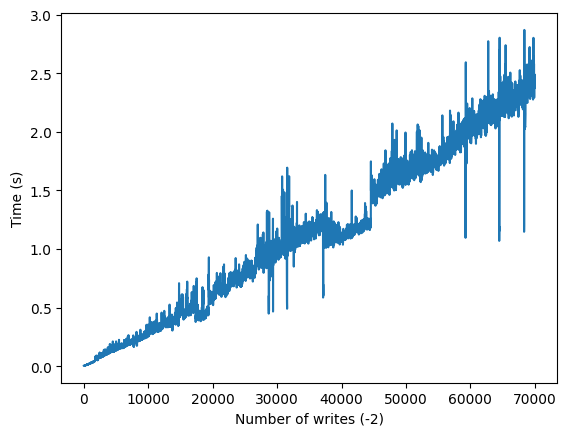

In [236]:
import matplotlib.pyplot as plt
plt.plot(timex, timewrite)
# plt.ylim(0,10)
plt.xlabel('Number of writes (-2)')
plt.ylabel('Time (s)')
plt.show()

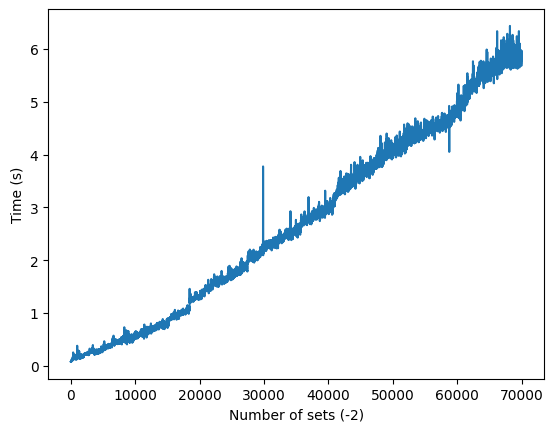

In [299]:
import matplotlib.pyplot as plt
plt.plot(timex, timeset)
# plt.ylim(0,10)
plt.xlabel('Number of sets (-2)')
plt.ylabel('Time (s)')
plt.show()